In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data Pre-Processing
## Pre-Processing Stages
- Cleaning Datasets

## Training Dataset

### Loading and Inspect Dataset


Found 900 files belonging to 3 classes.


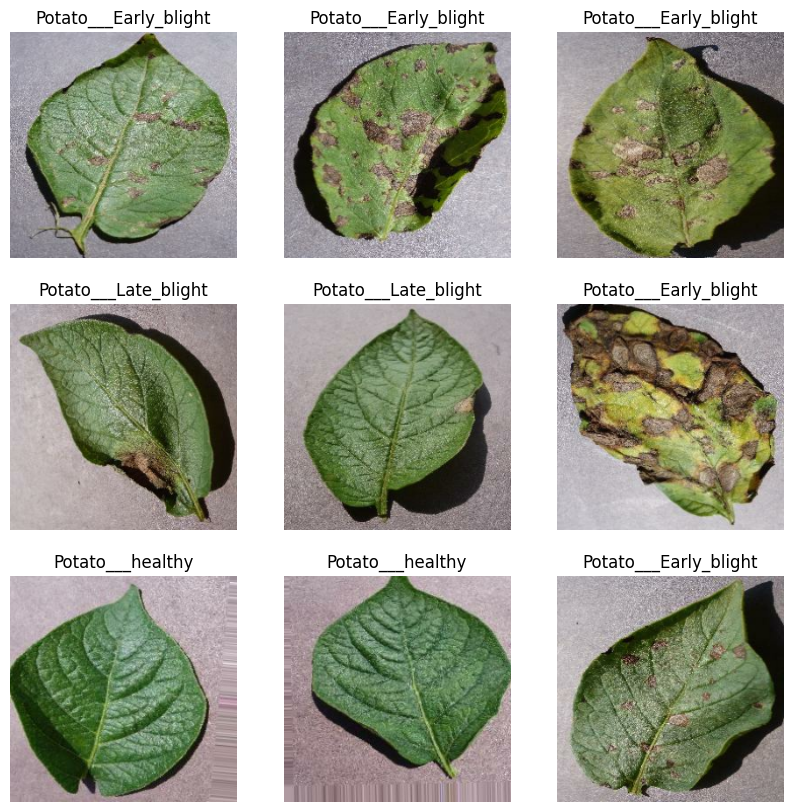

In [9]:
# Define the dataset directory
dataset_dir = "Train"

# Load dataset using Keras
dataset_train = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    image_size=(224, 224),  # Resize images to standard size
    batch_size=32
)

# Display a few images to check for anomalies
class_names = dataset_train.class_names
plt.figure(figsize=(10, 10))

for images, labels in dataset_train.take(1):  # Take one batch
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[int(labels[i].numpy())])  # Convert Tensor to int
        plt.axis("off")

plt.show()

Found 900 files belonging to 3 classes.


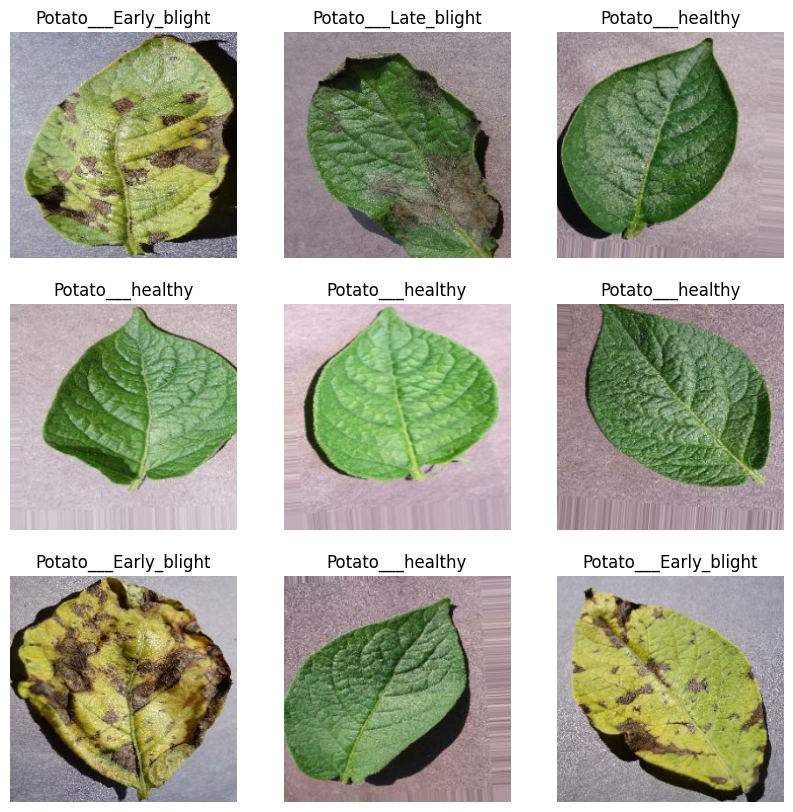

In [18]:
# Define the dataset directory
dataset_dir = "Train"

# Load dataset using Keras
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    image_size=(224, 224),  # Resize images to standard size
    batch_size=32
)

# Display a few images to check for anomalies
class_names = dataset.class_names
plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):  # Take one batch
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

### Remove Corrupted or Unsupported Files

In [21]:
import os
from PIL import Image, UnidentifiedImageError

# Define dataset directory
dataset_dir = "Train"

def is_valid_image(image_path):
    """Check if an image is valid and not corrupt."""
    try:
        with Image.open(image_path) as img:
            img.verify()  # Verify if it's a readable image
        return True
    except (OSError, UnidentifiedImageError):
        return False

# Loop through all image files in subdirectories
for class_name in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_name)

    # Skip non-directory files (if any)
    if not os.path.isdir(class_path):
        continue

    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)

        # Check if file is an actual image
        if not img_file.lower().endswith((".jpg", ".jpeg", ".png")):
            print(f"Skipping non-image file: {img_path}")
            continue

        # Check if the image is corrupted
        if not is_valid_image(img_path):
            print(f"Removing corrupted image: {img_path}")
            os.remove(img_path)

        #else:
            #print("Nothing to remove!")


### Remove Duplicate Images

In [ ]:
import hashlib

def get_image_hash(image_path):
    """Generate a hash for an image file."""
    with open(image_path, "rb") as f:
        return hashlib.md5(f.read()).hexdigest()

image_hashes = {}
for class_name in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_path):
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            img_hash = get_image_hash(img_path)
            if img_hash in image_hashes:
                print(f"Duplicate found: {img_path} (removing)")
                os.remove(img_path)
            else:
                image_hashes[img_hash] = img_path
                print("No duplicates found!")


### Remove mislabeled images

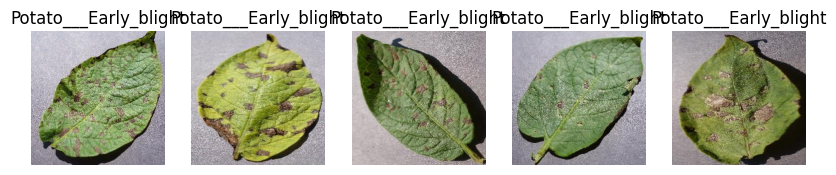

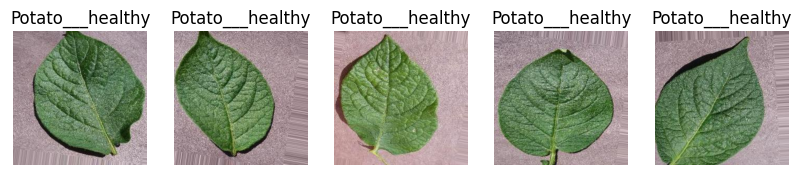

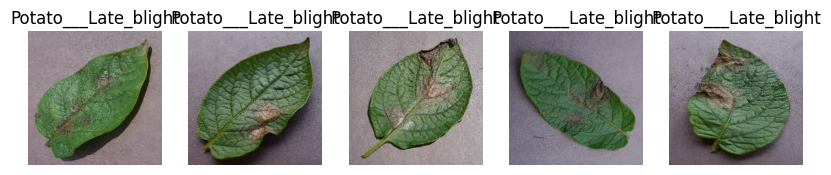

In [24]:
import random

# Display a few images from each class
for class_name in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_path):
        img_files = os.listdir(class_path)
        sample_files = random.sample(img_files, min(5, len(img_files)))
        
        plt.figure(figsize=(10, 5))
        for i, img_file in enumerate(sample_files):
            img_path = os.path.join(class_path, img_file)
            img = Image.open(img_path)
            ax = plt.subplot(1, 5, i + 1)
            plt.imshow(img)
            plt.title(class_name)
            plt.axis("off")
        plt.show()


In [1]:
# Before running, ensure you've installed the 
# optional dependencies via:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Plant vil"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "abdallahalidev/plantvillage-dataset",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

ValueError: Unsupported file extension: ''. Supported file extensions are: .csv, .tsv, .json, .jsonl, .xml, .parquet, .feather, .sqlite, .sqlite3, .db, .db3, .s3db, .dl3, .xls, .xlsx, .xlsm, .xlsb, .odf, .ods, .odt

### pip Installations

In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.
